In [1]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA

sys.path.insert(0, os.path.join(".."))
%reload_ext autoreload
%autoreload 2

In [2]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut
from lib.logistic_regression import LogisticRegression

In [3]:
plt.rcParams['figure.figsize'] = 15, 8
# plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

In [4]:
A = np.genfromtxt("../data/framingham.csv", delimiter=',', missing_values='NA', filling_values=0, skip_header=1, usecols=(1,4,5,9,10,11,12,13,14))
b = np.genfromtxt("../data/framingham.csv", delimiter=',', skip_header=1, usecols=(15))
b = b * 2 - 1

In [5]:
print(A.shape)

(4240, 9)


In [6]:
A = A[:1000]
b = b[:1000]
A = A / A.max(axis=0)

In [7]:
print(A.shape)
print(b.shape)

(1000, 9)
(1000,)


In [8]:
problem = LogisticRegression(0.2, A, b, L_y=8)

In [11]:
print(problem.L_xy, problem.mu_xy)
ny, nx = problem.A.shape

0.04577130334971993 1.2569508782604201e-12


In [12]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

3.617490216021736
[-0.32251799 -0.0623093   0.00162686 -0.23879661 -0.20037993 -0.28123076
 -0.27658168 -0.2860679  -0.14508469]
[ 0.2227949   0.27021387  0.0853638  -0.0601823   0.12045986  0.07142116
 -0.03007198  0.16037621  0.10033339  0.11521952  0.07554929  0.15658276
  0.22014753  0.11046924  0.20968382  0.18363804  0.03132501  0.1436097
  0.16287233  0.19206098  0.07564482  0.18521331  0.02919702  0.03912735
  0.05050359  0.07217304  0.12709765  0.12798169  0.11844805  0.1137064
  0.08424381  0.11827973  0.07408844  0.01130815  0.07238178  0.36150536
  0.07828588  0.03226736  0.05107557  0.18076985  0.12613163  0.14635398
  0.04308976  0.0886809  -0.26390488  0.08881437  0.09304152  0.10248534
  0.08239886  0.14562012 -0.05490085  0.17709765  0.06861453 -0.01562138
  0.2423167   0.15034955  0.16231607  0.06453843  0.07427795  0.06238306
  0.15832719 -0.08388659  0.05397631  0.13338908  0.09352376  0.0297582
 -0.00602513  0.09711964  0.05220672  0.05966005 -0.01896733  0.0780261

In [14]:
params = {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 10000
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-6)

EG: 100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:38<00:00, 258.78it/s]
C:\Users\Georgy\anaconda3\envs\pytorch_env\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
OMD: 100%|██████████████████████████████████████████████████████████████████████| 10000/10000 [00:29<00:00, 342.19it/s]


AltGDA-AM couldn't be used in such parameters' settings


LPD: 100%|██████████████████████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 345.07it/s]


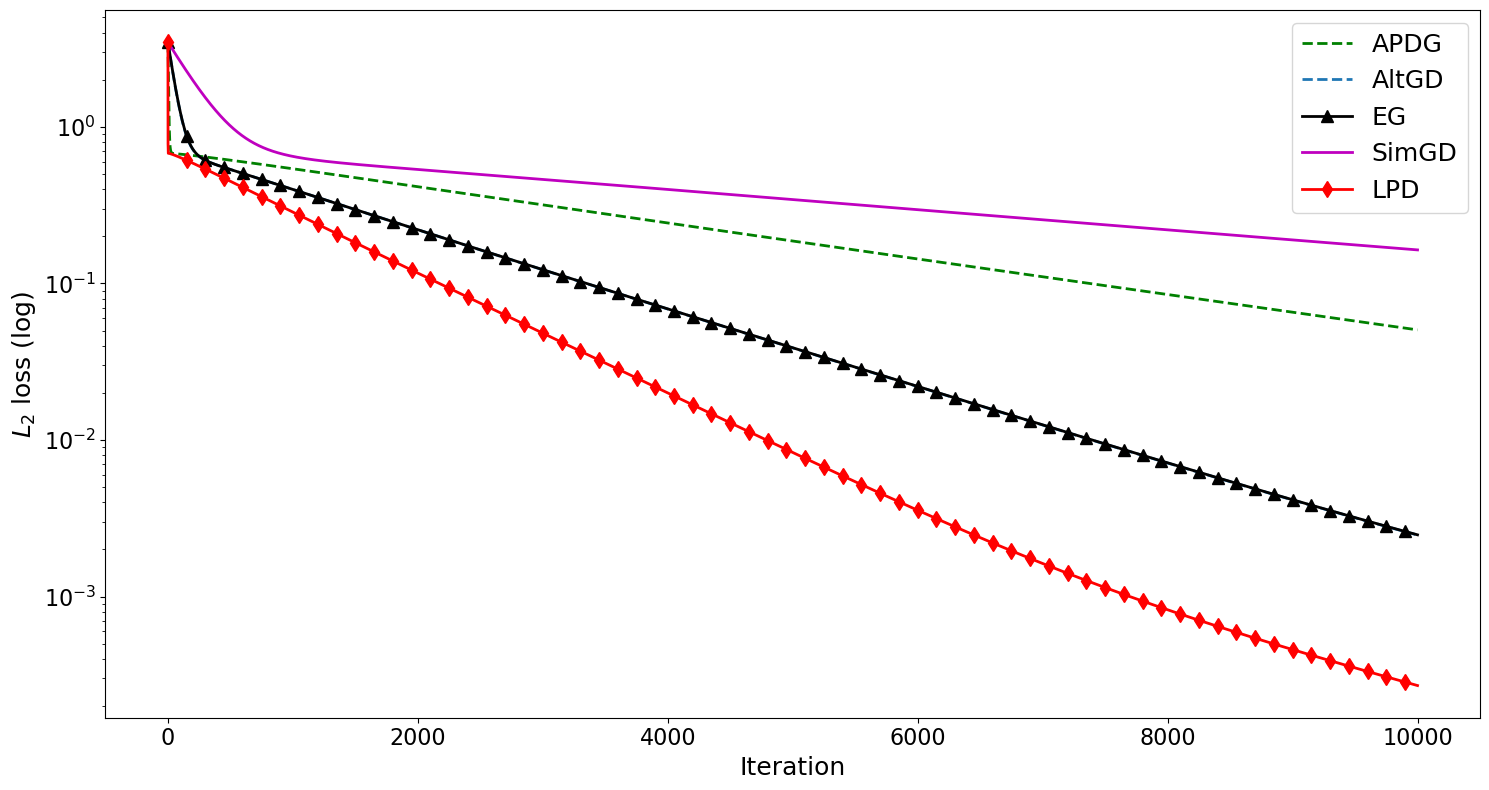

In [25]:
%matplotlib inline
plot_interval = 1
markevery=150
for method in methods_dict:
    if method not in ["OMD"]:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"LogisticOnFramingham_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"LogisticOnFramingham_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

In [22]:
print(methods_dict["LPD"]["x_hist"][-1])

[-0.32269789 -0.06214949  0.00158071 -0.23879098 -0.2004085  -0.28121205
 -0.2765173  -0.28599192 -0.14512698]


**AltGD has the same rate as EG**

**OMD didn't converge**